# Adult Income Dataset

<b>DESCRIPTION<b> :
    The dataset consists of 6 continuous attributes viz "age, fnlwgt, educational-num, capital-gain, capital-loss, hours-per-week" and 8 nominal attributes viz "workclass, education, marital-status, occupation, relationship, race, gender, native-country". The target attribute or the objective of the problem is to determine if an adult makes more than 50K.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.shape

(48842, 15)

In [9]:
df.isnull().sum()   # no null values, really ?

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
df.replace('?', np.NaN,inplace=True)

In [11]:
df.isnull().sum()   # ohh there were many '?' marks, we'll have to deal with null values

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [12]:
df_missing = df.isna()
df_num_missing = df_missing.sum()
missing = ['workclass','occupation','native-country']
for i in missing:
    mode = df[i].mode()[0]
    print(mode)
    df[i].fillna(mode, inplace=True)

Private
Prof-specialty
United-States


In [13]:
df.isnull().sum()  # No null values!! Yay!

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

##### UNIVARIATE ANALYSIS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C082159C8>,
      dtype=object)

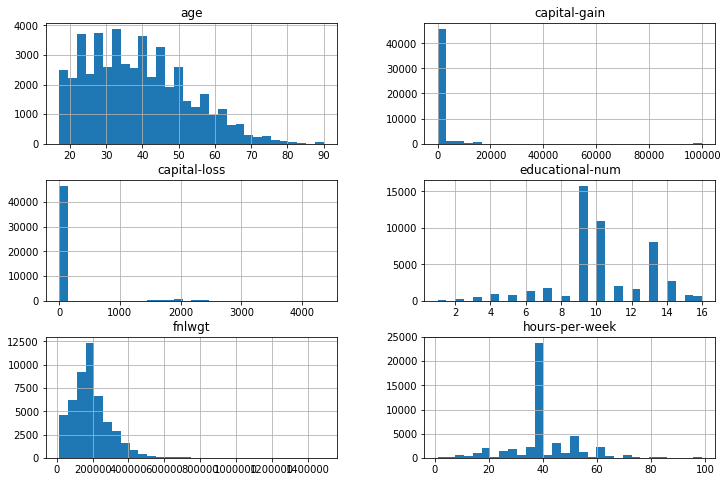

In [14]:
df.hist(column=['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week'],bins = 30,figsize=(12,8)) 

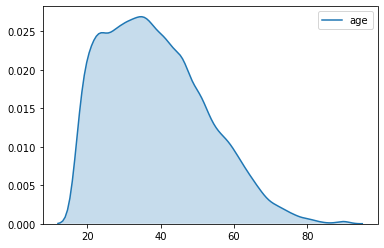

In [15]:
sns.kdeplot(df['age'],shade=True)  

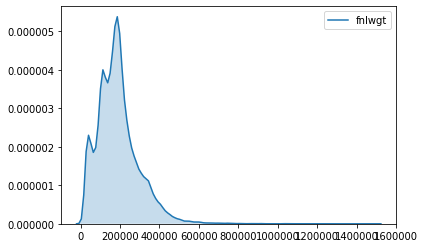

In [16]:
sns.kdeplot(df['fnlwgt'],shade=True)  

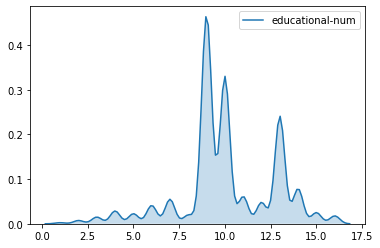

In [17]:
sns.kdeplot(df['educational-num'],shade=True)  

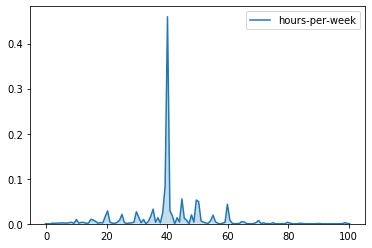

In [18]:
sns.kdeplot(df['hours-per-week'],shade=True)  

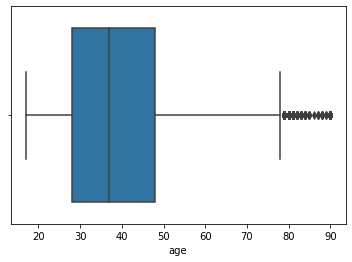

In [19]:
sns.boxplot(df['age'])

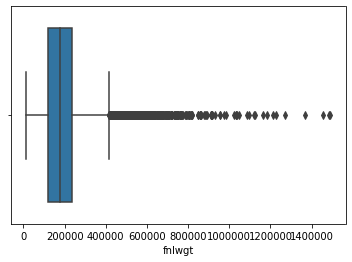

In [20]:
sns.boxplot(df['fnlwgt'])

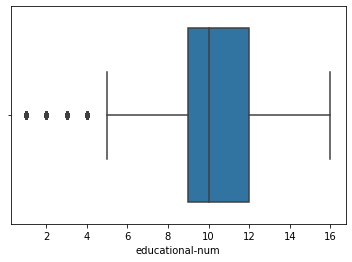

In [21]:
sns.boxplot(df['educational-num'])

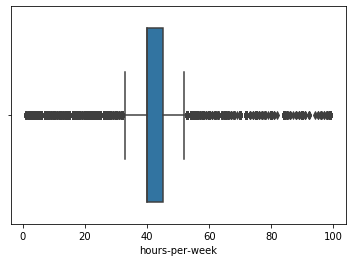

In [22]:
sns.boxplot(df['hours-per-week'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]),
 <a list of 74 Text xticklabel objects>)

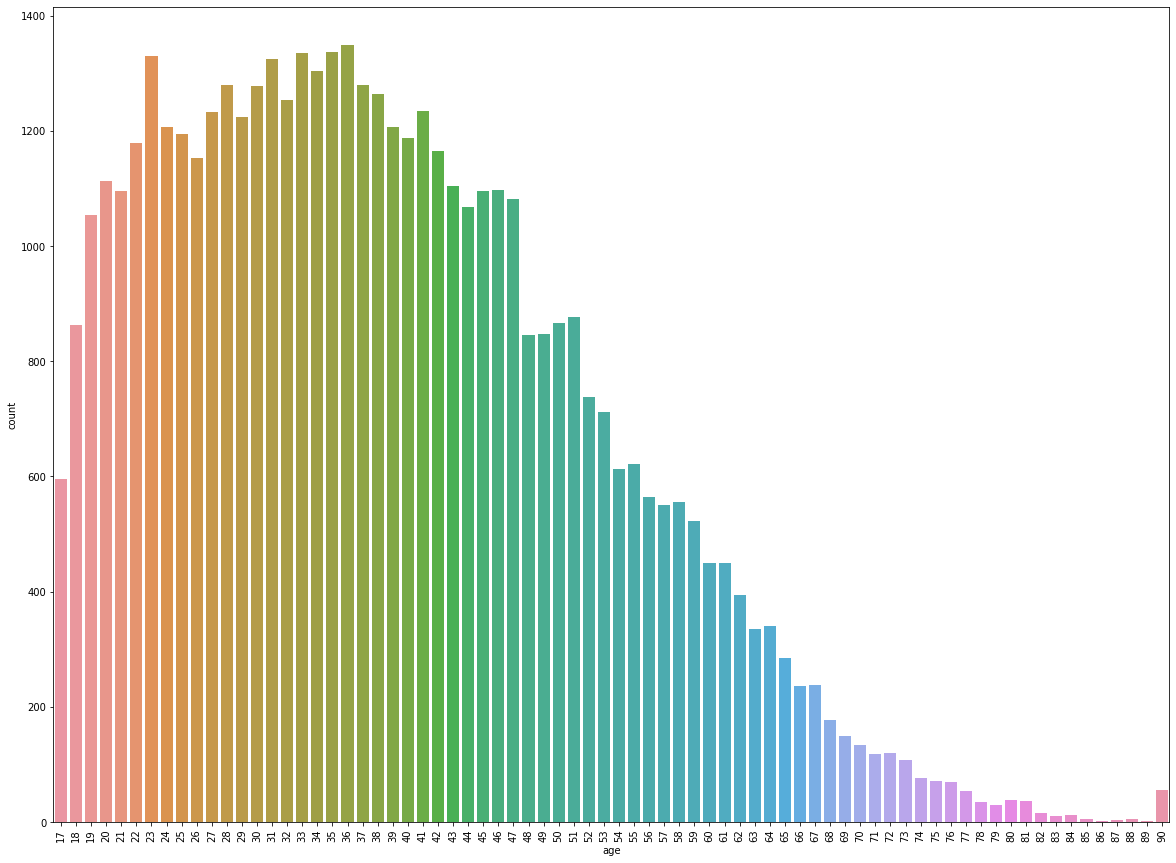

In [23]:
plt.figure(figsize=(20,15))
sns.countplot(df.age)
plt.xticks(rotation=90)

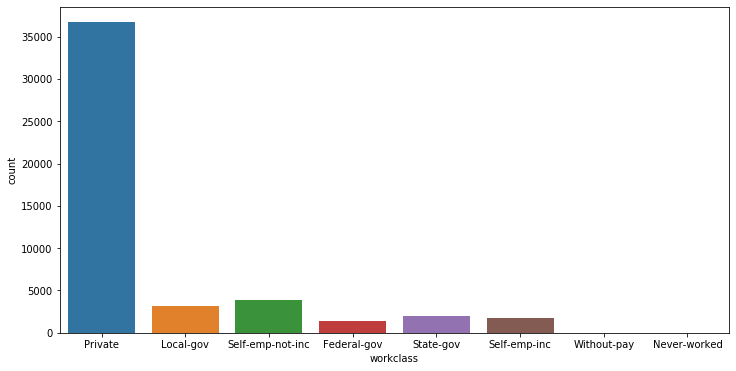

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(df['workclass'])

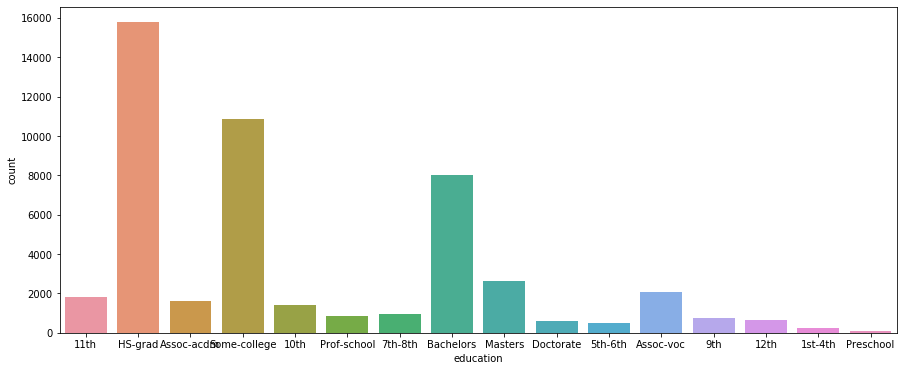

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(df['education'])
#plt.xticks(rotation=45)

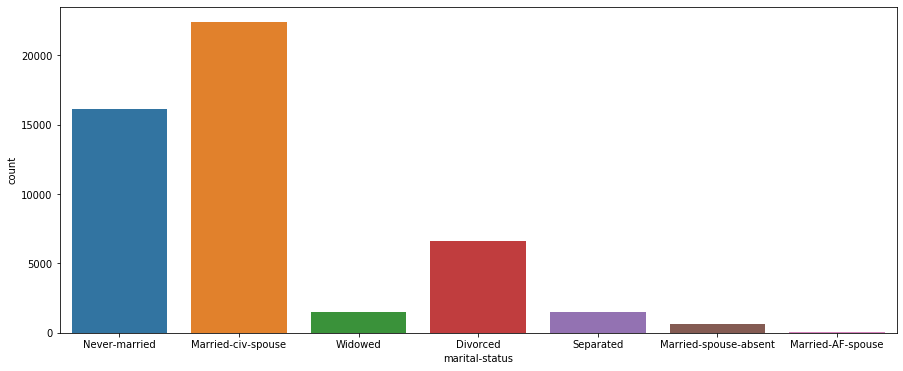

In [26]:
plt.figure(figsize=(15,6))
sns.countplot(df['marital-status'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

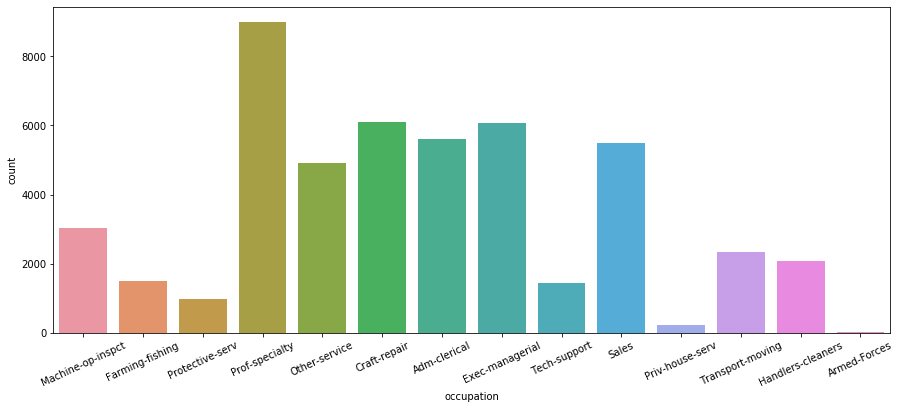

In [27]:
plt.figure(figsize=(15,6))
sns.countplot(df['occupation'])
plt.xticks(rotation=25)

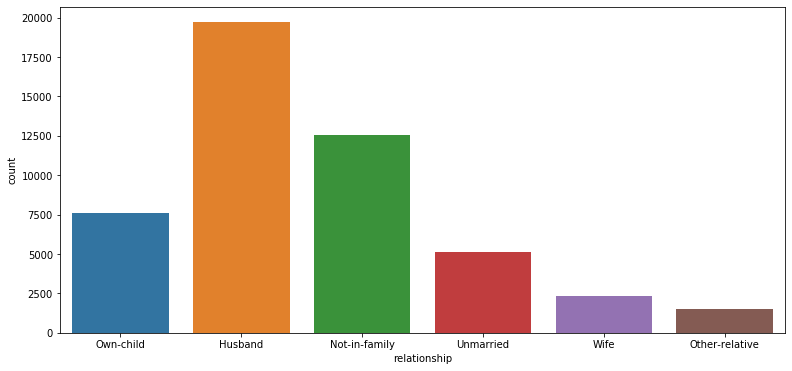

In [28]:
plt.figure(figsize=(13,6))
sns.countplot(df['relationship'])

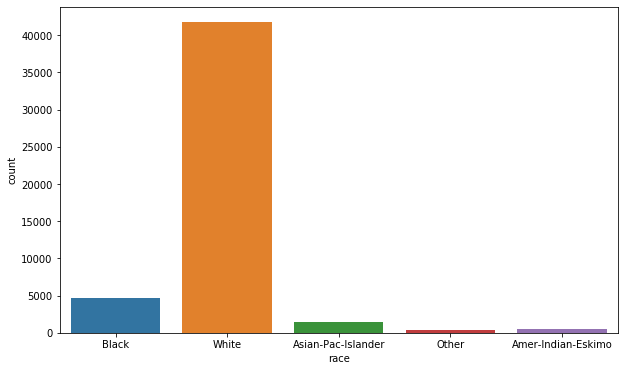

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(df['race'])

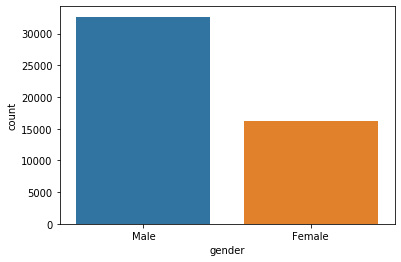

In [30]:
sns.countplot(df['gender'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text xticklabel objects>)

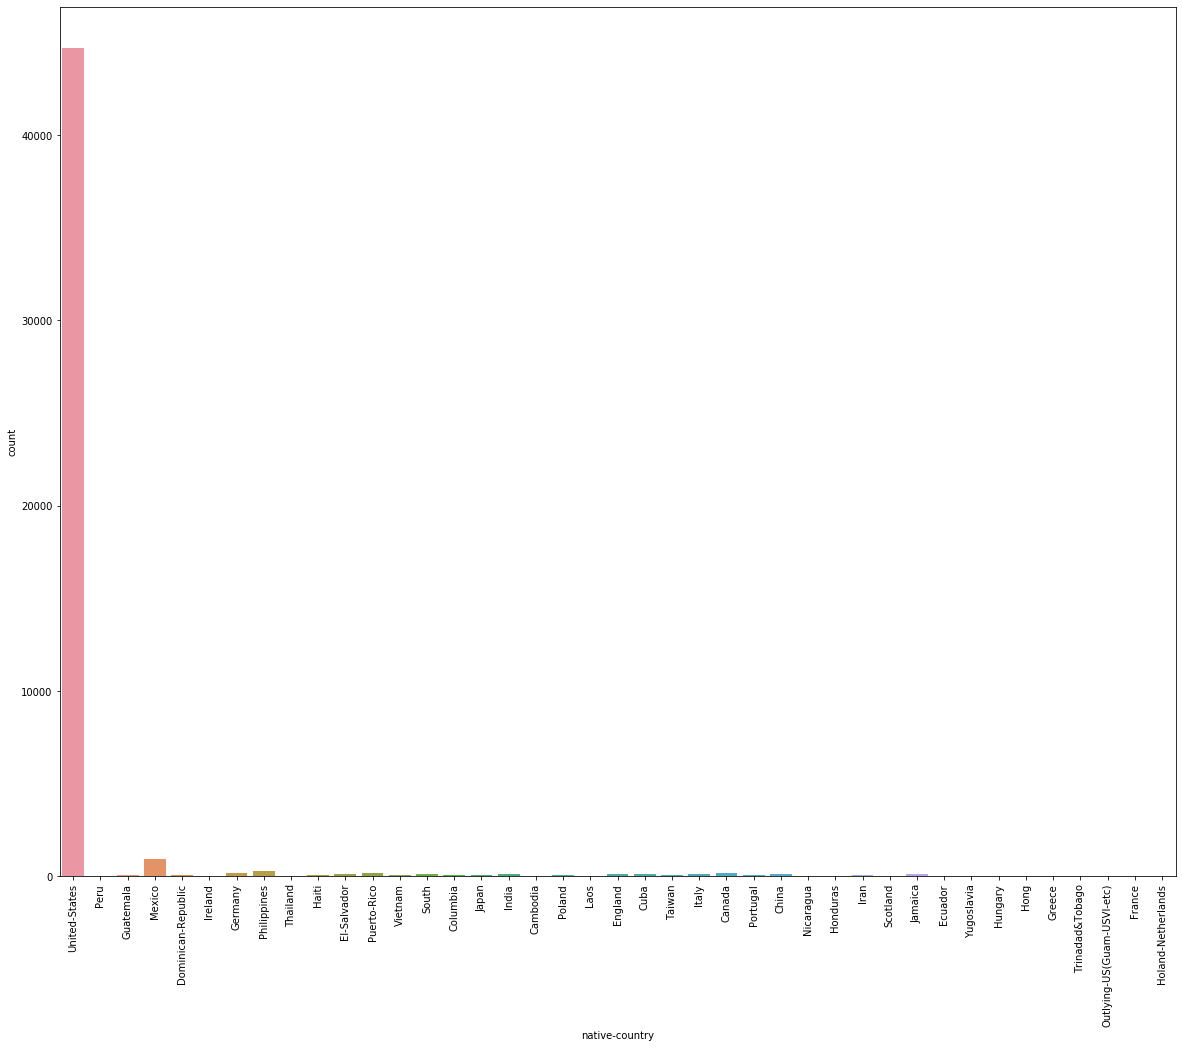

In [31]:
plt.figure(figsize=(20,16))
sns.countplot(df['native-country'])
plt.xticks(rotation=90)

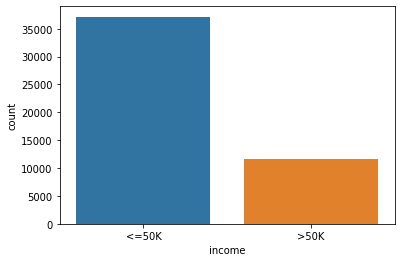

In [32]:
sns.countplot(df['income'])

##### BIVARIATE ANALYSIS

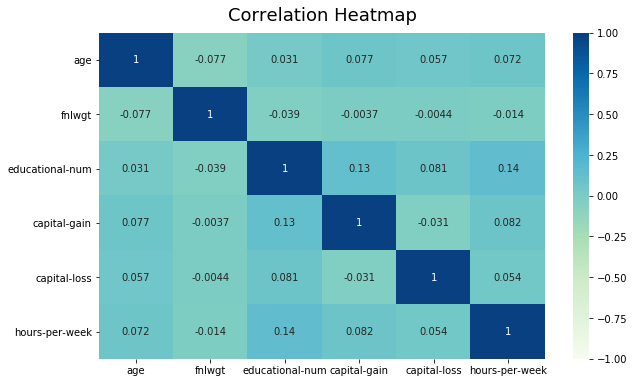

In [33]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="GnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

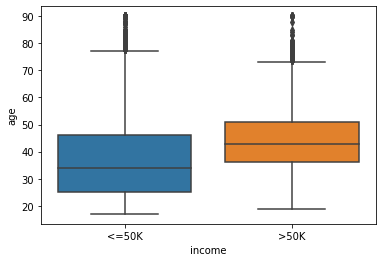

In [34]:
sns.boxplot(x='income',y='age',data=df)

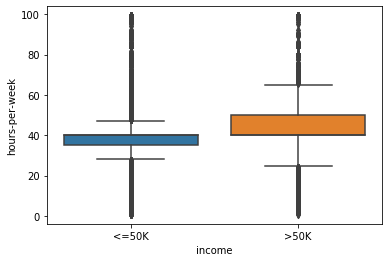

In [35]:
sns.boxplot(x='income',y='hours-per-week',data=df)

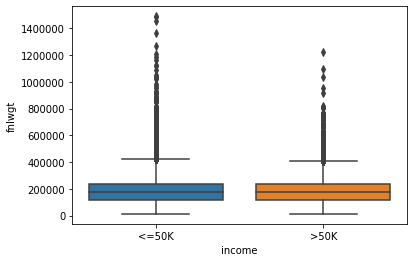

In [36]:
sns.boxplot(x='income',y='fnlwgt',data=df)

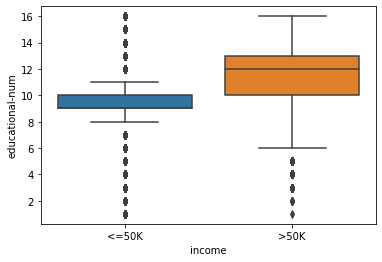

In [37]:
sns.boxplot(x='income',y='educational-num',data=df)

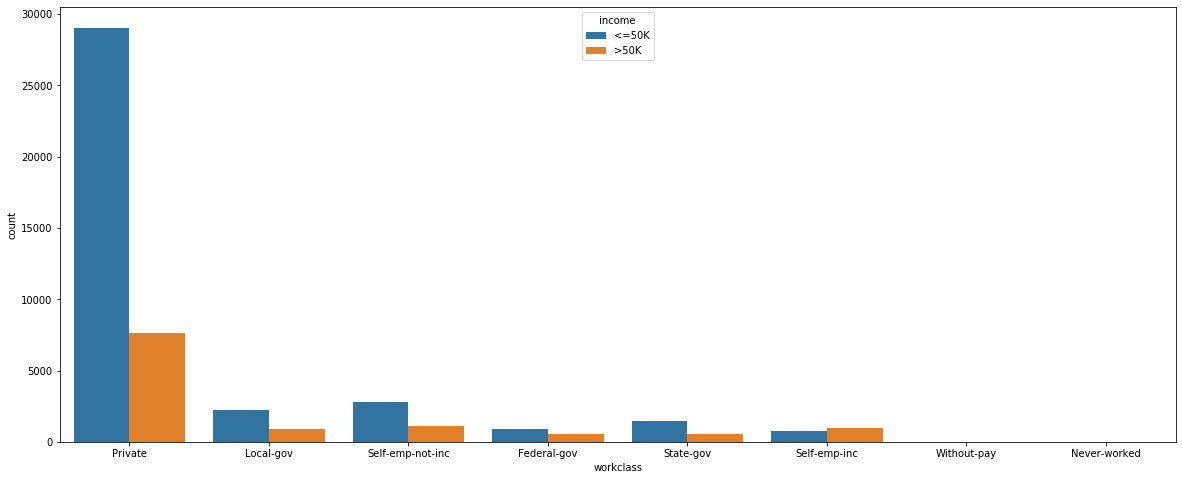

In [38]:
fig = plt.figure(figsize=(20,8))
sns.countplot(x='workclass',hue='income',data=df)

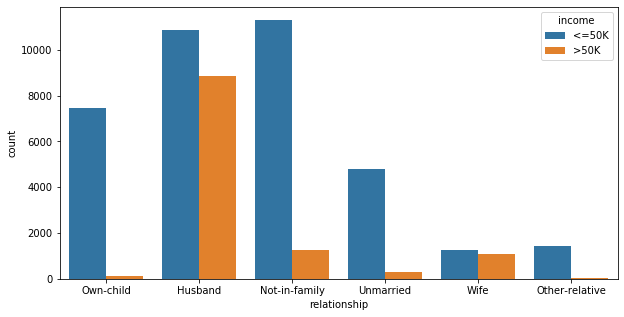

In [39]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="relationship", hue="income",data=df);

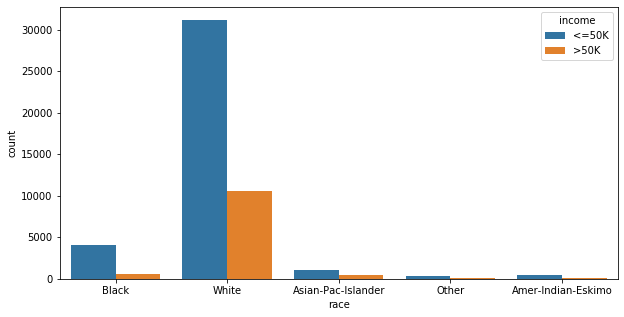

In [40]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="race", hue="income",data=df);

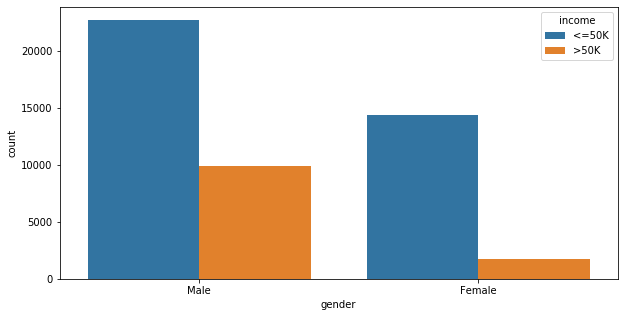

In [41]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="gender", hue="income",data=df);

In [42]:
#sns.pairplot(df,hue="income")

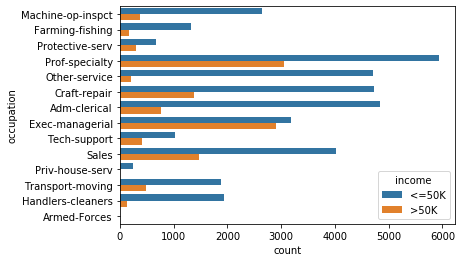

In [43]:
sns.countplot(y="occupation", hue="income",data=df)

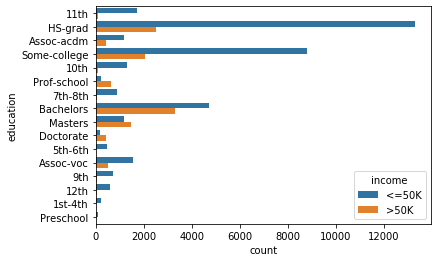

In [44]:
sns.countplot(y="education", hue="income",data=df)

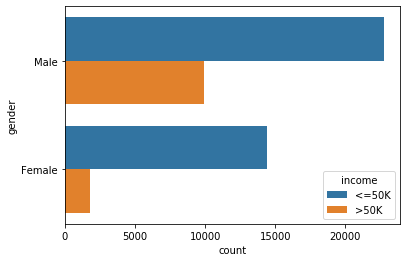

In [45]:
sns.countplot(y="gender", hue="income",data=df)

##### TREATING THE OUTLIERS

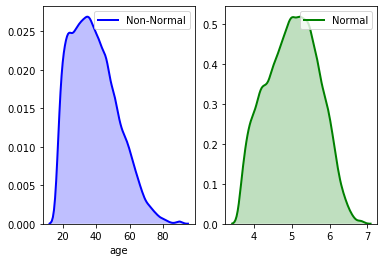

In [46]:
from scipy import stats
import matplotlib.pyplot as plt
df_copy=df.copy()
fitted_data, fitted_lambda = stats.boxcox(df_copy['age'])

fig, ax = plt.subplots(1, 2)
  
sns.distplot(df_copy['age'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="blue", ax = ax[0])

sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])

plt.legend(loc = "upper right")

In [47]:
df['age'] = fitted_data
df['fnlwgt']=df['fnlwgt'].clip(lower=df_copy['fnlwgt'].quantile(0.05), upper=df['fnlwgt'].quantile(0.95))
df['educational-num']=df['educational-num'].clip(lower=df['educational-num'].quantile(0.05), upper=df['educational-num'].quantile(0.95))

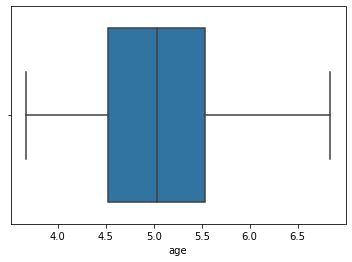

In [48]:
sns.boxplot(df['age'])

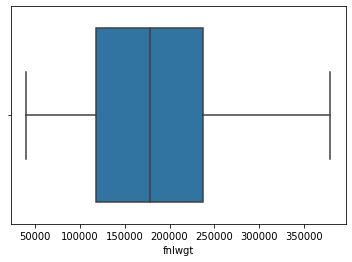

In [49]:
sns.boxplot(df['fnlwgt'])

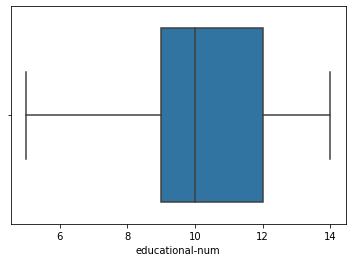

In [50]:
sns.boxplot(df['educational-num'])

##### ML MODELS

In [51]:
df.drop(['capital-gain','capital-loss'],axis=1,inplace=True)

In [52]:
df.drop(['education'],axis=1,inplace=True)


In [53]:
#df['marital-status']=df['marital-status'].map({'not-married':0,'married':1})

In [54]:
df.drop(['race','native-country'],axis=1,inplace=True)
df['gender']=df['gender'].map({'Male':0,'Female':1})

In [55]:
df=pd.get_dummies(df,drop_first=True)

In [56]:
X = df.iloc[:,:-1]

In [57]:
"""X=df_copy.drop('income',axis=1)
Y=df_copy['income']
X.shape"""

"X=df_copy.drop('income',axis=1)\nY=df_copy['income']\nX.shape"

In [58]:
X.head()

,age,fnlwgt,educational-num,gender,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,4.321006,226802.0,7,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.083503,89814.0,9,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.521908,336951.0,12,0,40,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,5.363942,160323.0,10,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.760644,103497.0,10,1,30,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [59]:
X.shape

(48842, 36)

In [60]:
y=df.iloc[:,-1]

In [61]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income_>50K, dtype: uint8

In [62]:
# splitting the data into training dataset and testing dataset using trin_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [63]:
# 2.Support Vector Machine


from sklearn.svm import SVC
model_SVM = SVC()
model_SVM.fit(X_train, y_train)
predicted_SVM = model_SVM.predict(X_test)
model_SVM.score(X_test,y_test)

0.7601173821060534

In [64]:
# 1.Logistic Regression

from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
predicted_LR = model_LR.predict(X_test)
model_LR.score(X_test,y_test)

0.7601173821060534

In [65]:
# 3.Decision Tree

from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
predicted_DT = model_DT.predict(X_test)
model_DT.score(X_test,y_test)

0.7780659250665393

In [66]:
# 4.K Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)
predicted_KNN = model_KNN.predict(X_test)
model_KNN.score(X_test,y_test)

0.7335016720125571

In [68]:
# 5. Random Forest

from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(random_state=0)
model_RF.fit(X_train, y_train)
predicted_RF = model_RF.predict(X_test)
model_RF.score(X_test,y_test)

0.8246775404354058

In [69]:
# Random Forest has the highest accuracy

### Summary

|Model|Accuracy|
|----|----|
|Support Vector Machine|76.01|
|Logistic Regression|76.01|
|Decision Tree|77.80|
|KNN|73.35|
|Random Forest|82.46|